
# Curvature


In [2]:
import utils
import numpy as np
import matplotlib.pyplot as plt
import torch
import plcurvature

In [21]:
train_dataset = utils.import_train(100_00)

In [22]:
train_dataset

ModelNet10(3991)

In [23]:
point_cloud = train_dataset[1]  # 1000 = chair

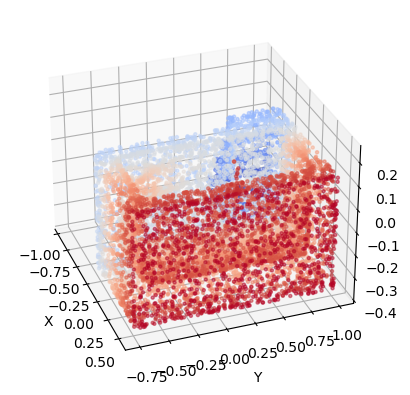

In [24]:
utils.draw_pointcloud(point_cloud)

In [25]:
def k_nearest_neighbors_single(point_cloud_pos, query_point, k):
    distances = torch.linalg.vector_norm(point_cloud_pos - query_point,dim=1, ord=2)
    _, indices = torch.topk(distances, k=k, largest=False)
    return point_cloud[indices]

In [26]:
# x = point_cloud[:, 0]
# y = point_cloud[:, 1]
# z = point_cloud[:, 2]
#
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
#
# scatter = ax.scatter(x, y, z, marker='.', alpha=.5)

In [27]:
####

In [30]:
from pyntcloud import PyntCloud
import pandas as pd

In [29]:
print(point_cloud)

Data(pos=[10000, 3], y=[1])


In [37]:

points = pd.DataFrame(point_cloud.pos,columns=["x","y","z"])
cloud = PyntCloud(points)

In [38]:
k_neighbors = cloud.get_neighbors(k=10)
k_neighbors

array([[6231, 6732, 1532, ..., 1671,  245, 5524],
       [ 671, 1928, 9403, ..., 2164, 2714, 8150],
       [6025, 7868, 1317, ..., 6642, 1254, 8690],
       ...,
       [6656, 7670, 1358, ..., 2958, 7913,   19],
       [2451, 8513, 7953, ..., 3645, 4215, 7966],
       [5879, 1258, 4791, ..., 1774, 5949, 2799]])

In [39]:
# eigenvalues
ev = cloud.add_scalar_field("eigen_values", k_neighbors=k_neighbors)

In [41]:
# curvature from eigenvalues
cloud.add_scalar_field("curvature", ev=ev)

'curvature(11)'

In [47]:
cloud.points

,x,y,z,e1(11),e2(11),e3(11),curvature(11)
0,-0.222146,0.217787,-0.249121,0.000896,0.000194,7.417315e-05,6.370766e-02
1,0.174150,-0.746328,0.016242,0.002547,0.001387,3.552714e-15,9.030532e-13
2,0.344140,-0.746328,0.000880,0.000866,0.000162,3.552714e-15,3.457348e-12
3,0.065524,-0.180786,-0.249121,0.000251,0.000089,2.220446e-16,6.526595e-13
4,0.388443,-0.062645,-0.170046,0.000427,0.000242,8.881784e-16,1.327826e-12
...,...,...,...,...,...,...,...
9995,-0.163688,0.187075,-0.249121,0.000399,0.000173,2.220446e-16,3.880888e-13
9996,0.418167,-0.502526,0.113625,0.000249,0.000107,3.955350e-05,1.001078e-01
9997,0.124935,-0.497889,-0.249121,0.000825,0.000322,2.220446e-16,1.936658e-13
9998,-0.163560,-0.253379,-0.370036,0.000573,0.000314,8.881784e-16,1.000553e-12


In [ ]:
curvature = cloud.points["curvature(11)"]
cloud.points = cloud.points[curvature > curvature.mean()]


In [52]:
%matplotlib qt
x = cloud.points.x
y = cloud.points.y
z = cloud.points.z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, marker='.', alpha=.5)